# **Programmer votre IA pour acheter votre voiture**

## **1. La première étape est la récupération des données.**
Nous utiliserons la bibliothèque de science des données appelée Pandas pour charger
l'ensemble des données. Au travers de Pandas, il est possible de lire le fichier de données
(carData.csv). Les données seront ensuite affectées et stockées dans une variable, par
exemple : car_data.

In [22]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
#import sqlalchemy
#import pymysql

from sklearn import svm
from sklearn.linear_model import LinearRegression


#### Les données sont dans le fichier carData.csv et seront affectées à la variable carData.

In [15]:
# Ouverture du fichier source et affectation des données à la variable car_data
car_data= pd.read_csv("carData.csv")

print(car_data)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

#### **Note de cours**  
Source m'ayant permis de commencer avec panda:  
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf


## **2. Explorer les données.**
Parcourir les colonnes pour s'approprier les données. Quelle est la taille du jeux de
données. Calculer quelques statistiques de base (moyenne, médiane, quartile, tracer la
distribution avec Matplotlib (histogramme).

#### **Quelques caractéristiques de la table de données:**  
Taille et statistique de base.

In [16]:
# Nombre de lignes et de colonnes de la table de données
print("Caractéristique de la table de données:")
print("La table comporte",car_data.shape[0],"lignes et",car_data.shape[1],"colonnes soit",\
      car_data.shape[0]*car_data.shape[1],"données.\n",)

print("\nNom des différentes colonnes et type de leurs données:")
#colonne= []
for col in car_data.columns:
    print("Colonne",col,"de type", car_data[col].dtype)
#    colonne.append(col)
#print(colonne)

print("\nStatistique sur la colonnes 'Selling_Price'.")
print("Moyenne:",car_data['Selling_Price'].mean())
print("L'écart type du prix des voiture:",car_data['Selling_Price'].std())
print("Prix de la voiture la moins chère:",car_data['Selling_Price'].min())
print("Prix de la voiture la plus chère:",car_data['Selling_Price'].max())
print("Distribution des prix: 1er quartile (25%):",car_data['Selling_Price'].quantile(0.25))
print("Distribution des prix: Prix médian:",car_data['Selling_Price'].quantile(0.5))
print("Distribution des prix: dernier quartile (75%):",car_data['Selling_Price'].quantile(0.75))
print("\nDe la voiture la moins chère jusqu'à la plus chère:")
print("De la moins chère à la plus chère:",car_data.sort_values(by='Selling_Price'))

print("\nInfos colonnes:\n",car_data.describe())

Caractéristique de la table de données:
La table comporte 301 lignes et 9 colonnes soit 2709 données.


Nom des différentes colonnes et type de leurs données:
Colonne Car_Name de type object
Colonne Year de type int64
Colonne Selling_Price de type float64
Colonne Present_Price de type float64
Colonne Kms_Driven de type int64
Colonne Fuel_Type de type object
Colonne Seller_Type de type object
Colonne Transmission de type object
Colonne Owner de type int64

Statistique sur la colonnes 'Selling_Price'.
Moyenne: 4.661295681063127
L'écart type du prix des voiture: 5.082811556177804
Prix de la voiture la moins chère: 0.1
Prix de la voiture la plus chère: 35.0
Distribution des prix: 1er quartile (25%): 0.9
Distribution des prix: Prix médian: 3.6
Distribution des prix: dernier quartile (75%): 6.0

De la voiture la moins chère jusqu'à la plus chère:
De la moins chère à la plus chère:                Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
200    Bajaj Pulsar 150  2006        

#### **Utilisation de matplotlib**

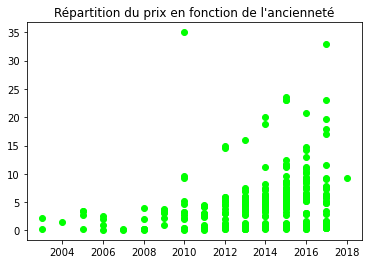

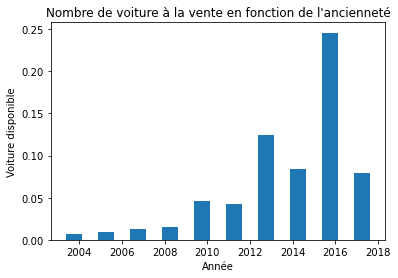

In [17]:
"""
Liste des données de la base:
car_data['Car_Name'], car_data['Present_Price'], car_data['Kms_Driven'], car_data['Fuel_Type'],
car_data['Seller_Type'], car_data['Transmission'], car_data['Owner'], car_data['Selling_Price'],
car_data['Year']
"""

plt.plot(car_data['Year'],car_data['Selling_Price'],linestyle = 'none',marker = 'o',c = 'lime')
plt.title("Répartition du prix en fonction de l'ancienneté")
plt.show()

plt.title("Nombre de voiture à la vente en fonction de l'ancienneté")
res = plt.hist(car_data['Year'],rwidth = 0.5, density= True)
plt.xlabel('Année')
plt.ylabel('Voiture disponible')

#car_data['Selling_Price'].plt.plot()
#car_data['Selling_Price'].plot.kde()
#plt.axis([0, 301, 0, 35])
plt.show()

#### **Notes de cours & ressources** 
Site bien fait et en français pour python et ses bibliothèques (notamment matplot, seaborn,...  
http://www.python-simple.com/python-matplotlib/matplotlib-intro.php

## **3 Chargement des données dans une base de données MySQL.**

In [18]:
baseDeDonnees = mysql.connector.connect(host="localhost",user="jpphi",password="jpphi", database="toto")
curseur = baseDeDonnees.cursor()
curseur.execute("SELECT * FROM carData_csv")

tabcar=curseur.fetchall() # tabcar contient toute les données du fichier carData.csv

# Création d'une frame. Les données dans la base sont toute du type "string", nous devront faire la conversion
dframe=pd.DataFrame(tabcar, columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price',\
                                        'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])

# Création d'une frame avec des données typées
dfc = pd.DataFrame(
    {
        "Car_Name": pd.Series(dframe['Car_Name'], dtype=np.dtype("O")),
        "Year": pd.Series(dframe['Year'], dtype=np.dtype("int64")),
        "Selling_Price": pd.Series(dframe['Selling_Price'], dtype=np.dtype("float")),
        "Present_Price": pd.Series(dframe['Present_Price'], dtype=np.dtype("float")),
        "Kms_Driven": pd.Series(dframe['Kms_Driven'], dtype=np.dtype("int64")),
        "Fuel_Type": pd.Series(dframe['Fuel_Type'], dtype=np.dtype("O")),
        "Seller_Type": pd.Series(dframe['Seller_Type'], dtype=np.dtype("O")),
        "Transmission": pd.Series(dframe['Transmission'], dtype=np.dtype("O")),
        "Owner": pd.Series(dframe['Owner'], dtype=np.dtype("int64"))
    }
)

print(dfc)

baseDeDonnees.close()

"""
Liste des données provenant de la base:
dfc['Car_Name'], dfc['Present_Price'], dfc['Kms_Driven'], dfc['Fuel_Type'], dfc['Seller_Type'], 
dfc['Transmission'], dfc['Owner'], dfc['Selling_Price'], dfc['Year']
"""

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

"\nListe des données provenant de la base:\ndfc['Car_Name'], dfc['Present_Price'], dfc['Kms_Driven'], dfc['Fuel_Type'], dfc['Seller_Type'], \ndfc['Transmission'], dfc['Owner'], dfc['Selling_Price'], dfc['Year']\n"

#### **Note de cours & ressources**

**Autres ressources:**  
https://www.mysqltutorial.org/import-csv-file-mysql-table/

## **4. Visualiser les données grâce à la librairie Seaborn.**

Notamment avec le type de tracé `catplot`, expliquer dans quel cas ce type de tracé est
pertinent.

/home/jpphi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


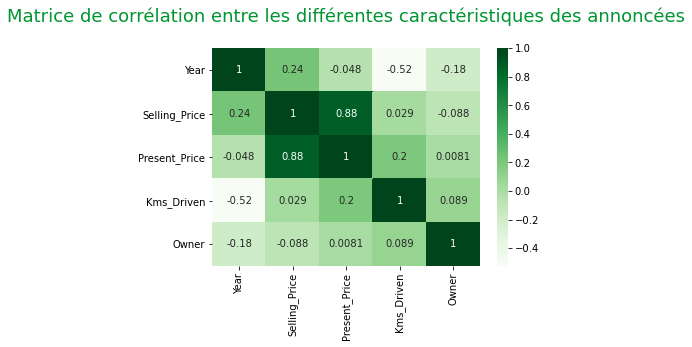

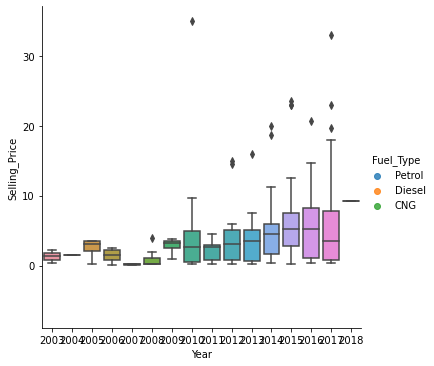

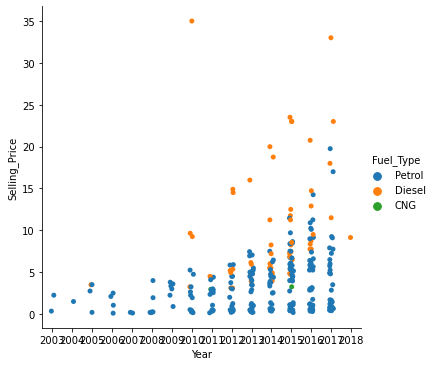

In [19]:
# seaborn catplot

# Affichage d'une matrice de correllation
sns.heatmap(dfc.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annoncées\n", fontsize=18,\
          color='#009432')

g = sns.lmplot("Year","Selling_Price",hue ='Fuel_Type' ,data= dfc)

# Chandelier Japonnais
ax = sns.boxplot(x="Year", y="Selling_Price", data=dfc)

sns.catplot(x="Year", y="Selling_Price", hue="Fuel_Type", data=dfc)

#### **Notes de cours & ressources** 
Site bien fait et en français pour python et ses bibliothèques (notamment matplot, seaborn,...  
http://www.python-simple.com/python-matplotlib/matplotlib-intro.php

## **5. Quantifier la relation entre l'âge et le prix de vente**

#### **0. Pour quatifier la relation âge/prix de vente, recherche d'une corrélation éventuelle**

Matrice de correllation:
Correlation Année/Prix:
 [[1.         0.23614098]
 [0.23614098 1.        ]] 
Pour qu'il y ai correlation, il faut un nombre dont la valeur absolu est comprise entre 0.8 et 1.
Il n'y a pas de correllation entre le prix de vente et l'année.

Matrice de correllation:
Correlation Année/Prix vente/Prix neuf/kilomètre parcouru:

[[ 1.          0.23614098  0.87898255  0.02918709]
 [ 0.23614098  1.         -0.04758421 -0.52434204]
 [ 0.87898255 -0.04758421  1.          0.20364703]
 [ 0.02918709 -0.52434204  0.20364703  1.        ]]
La seule correllation qui apparait est entre le prix de vente et le prix du véhicule neuf ce qui a peut d'intérêt


Text(0.5, 1.0, 'Corrélation entre les différentes données du tableur\n')

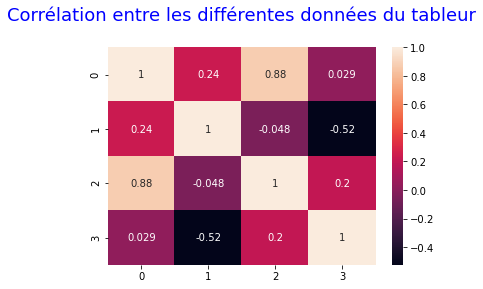

In [23]:
print("Matrice de correllation:\nCorrelation Année/Prix:\n", \
      np.corrcoef(dfc['Selling_Price'],dfc['Year']),\
      "\nPour qu'il y ai correlation, il faut un nombre dont la valeur absolu est \
comprise entre 0.8 et 1.\nIl n'y a pas de correllation entre le prix de vente et l'année.")
      
print("\nMatrice de correllation:\nCorrelation Année/Prix vente/Prix neuf/kilomètre parcouru:\n")
mat2=[dfc['Selling_Price'],dfc['Year'],dfc['Present_Price'],dfc['Kms_Driven']]
print(np.corrcoef(mat2))
print("La seule correllation qui apparait est entre le prix de vente et le prix du véhicule neuf \
ce qui a peut d'intérêt")

sns.heatmap(np.corrcoef(mat2),annot= True)
plt.title("Corrélation entre les différentes données du tableur\n", fontsize=18, color= 'blue')


#### **1. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie Numpy.**

Coeficient du polynome de régression [ 4.15091695e-01 -8.31178925e+02]
 
0.4151 x - 831.2


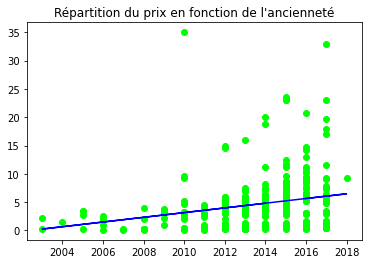

Pour l'années 2010, le prix moyen par régression est: 3.155381626106646


In [24]:
# Affichage du nuage de points
plt.plot(dfc['Year'],dfc['Selling_Price'],linestyle = 'none',marker = 'o',c = 'lime')
plt.title("Répartition du prix en fonction de l'ancienneté")

# Régression Linéaire: La fonction polyfit renvoie les coeficients de la fonction polynome.
#  Pour une régression linéaire, ce sont les coef a' et 'b' de la droite y=ax+b
forme = np.polyfit(dfc['Year'], dfc['Selling_Price'], 1)
print("Coeficient du polynome de régression",forme)

# La fonction poly1d renvoie une fonction polynomiales dont les coefficients sont dans la variable
#   passée en paramètre. Cette fonction est utilisée pour faire des prédictions si la régression
#   est pertinante.
polynome = np.poly1d(forme)
print(polynome)

# Affichage du polynome de régression linéaire
plt.plot(dfc['Year'],polynome(dfc['Year']),c = 'blue')

plt.show()

print("Pour l'années 2010, le prix moyen par régression est:",polynome(2010))

#### **2. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie ​Scipy.**

La correllation entre les variables est faible ou nulle


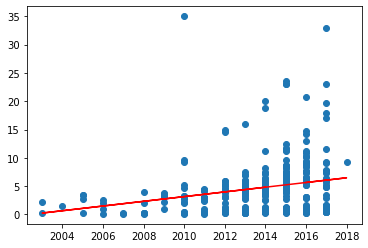

Pour l'années 2010, le prix moyen par régression est: 3.155381626106305


In [25]:
# les valeur retournées par linregress sont:
#   Les coeffs a et b de la droite de régression linéaire y= ax+b
#   Les coeff de correlation
#   p_value... Et ben... je sais pas trop :)
#   L'erreur standard
a, b, r_value, p_value, std_err = stats.linregress(dfc['Year'],dfc['Selling_Price'])
if r_value > 0.8:
    print("Correlation positive entre les valeurs")
elif r_value < -0.8:
    print("Correlation négative entre les valeurs")
else:
    print("La correllation entre les variables est faible ou nulle")
#print(p_value,std_err)

plt.plot(dfc['Year'], dfc['Selling_Price'],'o')
plt.plot(dfc['Year'], a * dfc['Year'] + b, color="red" )
plt.show()

print("Pour l'années 2010, le prix moyen par régression est:",a*2010 + b)

#### **3. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie sklearn**

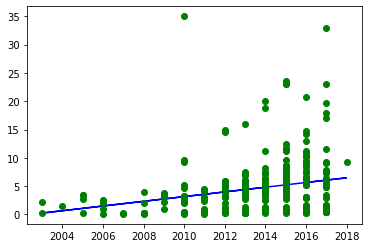

In [27]:
#import sklearn as  skl

regressor = LinearRegression()

dfc['Year'].values.reshape(-1,1)

regressor.fit(dfc['Year'].values.reshape(-1,1), dfc['Selling_Price'])

#predict = np.poly1d(model)

ytest = regressor.predict(dfc['Year'].values.reshape(-1,1))
#ytest = 0
i=dfc['Year'][3]
#print(ytest)

plt.plot(dfc['Year'],ytest,c = 'blue')
plt.plot(dfc['Year'], dfc['Selling_Price'],'o',color="green")

plt.show()


#### **Note de cours & ressources**  
La librairie sklearn est à privilégier car la plus complète.

#### **4. Améliorer le modèle en utilisant plusieurs variables d'entrée**  
telles que `Kms_Driven` et `Transmission` (réaliser une régression linéaire multiple en Python avec sklearn).

Une voiture de 2010 avec 50000 km devrait couter: [[2.80978336]]


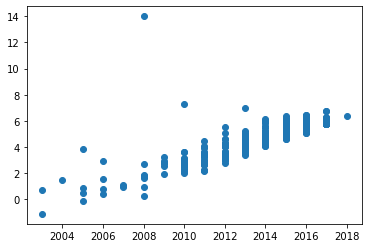

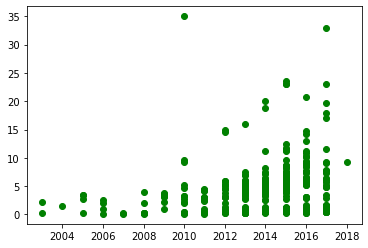

In [28]:
regressor = LinearRegression()

#dfc['Year'].values.reshape(-1,1)

X= dfc[['Year','Kms_Driven']] 

#regressor.fit(dfc['Year'].values.reshape(-1,1), dfc['Selling_Price']) # reshape indispensable sinon erreur!

regressor.fit(X, dfc[['Selling_Price']]) 



#predict = np.poly1d(model)

ytest = regressor.predict(X) # reshape indispensable sinon erreur!
y2010b= regressor.predict([[2010,50000]])
print("Une voiture de 2010 avec 50000 km devrait couter:",y2010b)

plt.plot(dfc['Year'],ytest,'o')
plt.show()

plt.plot(dfc['Year'], dfc['Selling_Price'],'o',color="green")
plt.show()

#### **5. Conclure**  
**Le jeux de données est trop hétérogène**. Il faudrait donc trouver un paramètre permettant de faire des sous-groupes et classer les voitures en fonction  
de leur gamme. L'utilisation de la donnée Present_Price permettrait de réaliser cela avec un SVM.  
Il faudrait peut-être aussi nettoyer les données des quelques valeurs abérantes faisant apparaitre des voitures trés haut de gamme ou de collection et dont la rareté ne permet pas d'avoir suffisamment de donnée pour être exploitées.

#### 6. Créer VOTRE Class LinearRegression.

In [29]:
class RegLin:
    count= 0
    def __init__(self):
        RegLin.count= RegLin.count + 1 # Nombre de fois ou la classe a été instancier
        
    def madame_irma(self,an,prix,x):
        # On appel la fonction pour déterminé les coefficients de la droite de reg. linéaire
        a,b = self.coeff_qui_va_bien(an,prix)
        y= a * x + b
        return y
    
    def coeff_qui_va_bien(self,an,prix):
        tabx, taby= an, prix
        nbel= len(an)
        x_sum, x2_sum, y_sum, xy_sum = 0, 0, 0, 0.

        # calcul des sommes
        for xi, yi in zip(tabx, taby):
            x_sum += xi
            x2_sum += xi**2
            y_sum += yi
            xy_sum += xi * yi

        # calcul des paramètres
        a = (nbel * xy_sum - x_sum * y_sum) / (nbel * x2_sum - x_sum**2)
        b = (x2_sum * y_sum - x_sum * xy_sum) / (nbel * x2_sum - x_sum**2)

        return a, b


# données de base
xan, yprix=dfc['Year'], dfc['Selling_Price']

reg=RegLin()
"""
print(RegLin.count)
reg1=RegLin()
print(RegLin.count)
reg2=RegLin()
print(RegLin.count)
"""

print("Coeficient de la droite de régression linéaire: ",reg.coeff_qui_va_bien(xan,yprix))
print("Pour une voiture de 2010, madame Irma dit: Le prix que tu paieras sera de ",\
      reg.madame_irma(xan,yprix,2010))

Coeficient de la droite de régression linéaire:  (0.4150916946338404, -831.1789245879519)
Pour une voiture de 2010, madame Irma dit: Le prix que tu paieras sera de  3.15538162606731


#### **Note de cours**  
Réalisation de l'algo:
https://gsalvatovallverdu.gitlab.io/python/moindres-carres/

## 7. Pensez-vous possible de résoudre ce problème en implémentant un algorithme de Support Vector Machines (SVM)​ ? Justifier votre réponse.

Un **SVM** permet de **séparer les données en sous groupe plus cohérent**.  
Travailler sur des jeux de donnée respectant la segmentation du marché des voitures en game  
(entrée, moyen et haut de game) permettrait de faire apparaitre des statistiques plus cohérentes,  
et notamment des régressions linéaire plus pertinante.
**L'utilisation de la donnée Present_Price**, c'est à dire du prix de vente de la voiture neuve, peut  
permettre de faire un **tri des voitures** et les classer dans **leurs games** respective.

La régression linéaire utilisant SVM n'apporte rien de plus que les régression fait avec les autres bibliothèques.

In [31]:
#Create a svm Classifier
clf = svm.SVR(kernel='linear') # Linear Kernel

y= np.array(dfc['Selling_Price'])

X= np.array(dfc['Year']).reshape(-1,1)

clf.fit(X, y)

#Predict the response for test dataset
y_pred = clf.predict(X)

#Prévision pour une année
annee= 2010
y_pred = clf.predict([[annee]])

print(f"Pour l'année {annee} la prédiction donne {y_pred}")

Pour l'année 2010 la prédiction donne [2.66249998]


#### **Note de cours**  
https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau

## **8. Héberger vos sources sous github**

### https://github.com/jpphi/brief1

#### **Note de cours**  
Création d'un reposit sur github  
Dans le répertoire du brief  
faire un **git init**  
ajouter les fichiers concernés par **git add**  
commentaire et marquage des fichiers à dont la version à changer **git commit -am "message"**  
puis envoyer les modifications au serveur **git push origine main**

## 9. Proposer un dashboard comme livrable de votre étude

## 10. Question bonus : Vous avez trouvé votre voiture au meilleur prix, vous l’achetez. 3 jours après, vous êtes en panne. Quelles données manque-il à votre analyse ?

**Il manque des données sur la fiabiltée des voitures** en fonction de leur constructeurs, de leurs kilométrages (temps moyen de bon fonctionnement), de leur motorisation (les moteurs diesel ont une durée de vie plus longue en général),... Liste non exhautive. 

# Divers notes de cours plus générales 

### Web scraping

<p><b>Selenium: https://www.selenium.dev/documentation/fr/</b><br/>
Navigateur pour faire du scraping sur des sites demandant une identification<br/> 
Selenium n'es pas installé par défaut. C'est aussi une API python fournissant des fonctions</p>

#### Présentation des données

**Le data scientist** trés didactique et en Français  
https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/  
Notion d'over et under fitting

In [32]:
print(dfc['Year'])
x= dfc['Year']
#x= np.array(dfc['Year']).reshape(-1,1)
x = x[:,np.newaxis]
print(x)


0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64
[[2014]
 [2013]
 [2017]
 [2011]
 [2014]
 [2018]
 [2015]
 [2015]
 [2016]
 [2015]
 [2017]
 [2015]
 [2015]
 [2015]
 [2009]
 [2016]
 [2015]
 [2016]
 [2015]
 [2010]
 [2016]
 [2017]
 [2011]
 [2014]
 [2013]
 [2011]
 [2013]
 [2017]
 [2010]
 [2015]
 [2012]
 [2011]
 [2014]
 [2014]
 [2014]
 [2011]
 [2015]
 [2003]
 [2016]
 [2003]
 [2016]
 [2014]
 [2008]
 [2014]
 [2012]
 [2014]
 [2013]
 [2006]
 [2015]
 [2017]
 [2012]
 [2015]
 [2017]
 [2013]
 [2005]
 [2009]
 [2015]
 [2010]
 [2014]
 [2014]
 [2013]
 [2015]
 [2014]
 [2015]
 [2017]
 [2014]
 [2017]
 [2010]
 [2011]
 [2016]
 [2014]
 [2011]
 [2013]
 [2011]
 [2014]
 [2015]
 [2013]
 [2004]
 [2010]
 [2012]
 [2016]
 [2015]
 [2017]
 [2015]
 [2005]
 [2006]
 [2010]
 [2012]
 [2013]
 [2014]
 [2009]
 [2014]
 [2005]
 [2015]
 [2008]
 [2012]
 [2016]
 [2017]
 [2013]
 [2010]
 [2016]
 [2017]
 [2017]
 [2017

<ipython-input-32-f0f8e1a6646a>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]
